In [2]:
import numpy as np
import pandas as pd
%matplotlib inline 
import bamboolib
import plotly.express as px
import seaborn as sns

In [3]:
from sklearn.feature_selection import f_regression
import statsmodels.api as sm
from scipy import stats

from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn import datasets

In [4]:
train_housing = pd.read_csv('train_housing_dropnull.csv', index_col=0)

In [5]:
#Looking at the quality and condition data
price        = train_housing['SalePrice']
quality_condition = train_housing.filter(regex='Qual$|Cond$|Qu|QC')
quality_condition.head()

OverallQual  OverallCond ExterQual ExterCond BsmtQual BsmtCond HeatingQC  \
754            5            5        TA        TA       TA       TA        Ex   
404            6            5        TA        TA       TA       TA        TA   
538            7            6        TA        TA       TA       TA        Gd   
777            7            5        TA        TA       Gd       TA        Ex   
726            5            5        TA        TA       TA       TA        TA   

     LowQualFinSF KitchenQual   FireplaceQu GarageQual GarageCond  
754             0          TA  No_Fireplace         TA         TA  
404             0          TA            Gd         TA         TA  
538             0          TA  No_Fireplace         TA         TA  
777             0          TA  No_Fireplace         TA         TA  
726             0          TA            Fa         TA         TA

In [6]:
#I will drop LowQualFinSF from quality_condition
quality_condition= quality_condition.drop(columns =['LowQualFinSF'])

In [7]:
#I will do label encoding to see which part of the house effects the overall quality and overall conditions
#creating a label map
lab_ord_map = {'Po': 1, 'Fa': 2, 'TA': 3, 
               'Gd': 4, 'Ex': 5}

In [8]:
#The possible cases can be
#1. house with no garage
#2. houses with no basement
#3. houses with no fireplace

In [9]:
#How many houses do not have a garage
quality_condition['GarageQual'].value_counts()
#There are 101 houses with no garage

TA           1646
No_garage      89
Fa             83
Gd             16
Ex              3
Po              1
Name: GarageQual, dtype: int64

In [10]:
#How many houses do not have a basement
quality_condition['BsmtQual'].value_counts()
#There are 51 houses with no basement

TA             901
Gd             721
Ex             114
Fa              55
No_basement     47
Name: BsmtQual, dtype: int64

In [11]:
quality_condition.replace({'ExterQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'BsmtQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_basement': 0}},inplace=True)
quality_condition.replace({'BsmtCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_basement': 0}},inplace=True)
quality_condition.replace({'FireplaceQu': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_Fireplace': 0}},inplace=True)
quality_condition.replace({'GarageQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_garage': 0}},inplace=True)
quality_condition.replace({'GarageCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5,'No_garage': 0}},inplace=True)
quality_condition.replace({'HeatingQC': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)
quality_condition.replace({'KitchenQual': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}},inplace=True)


In [12]:
quality = quality_condition[['OverallQual','ExterQual','FireplaceQu','BsmtQual','GarageQual','HeatingQC','KitchenQual']]


In [13]:
data_qual = quality.melt(id_vars=['OverallQual'], var_name='dataset', value_name='values')

<AxesSubplot:xlabel='ExterQual', ylabel='OverallQual'>

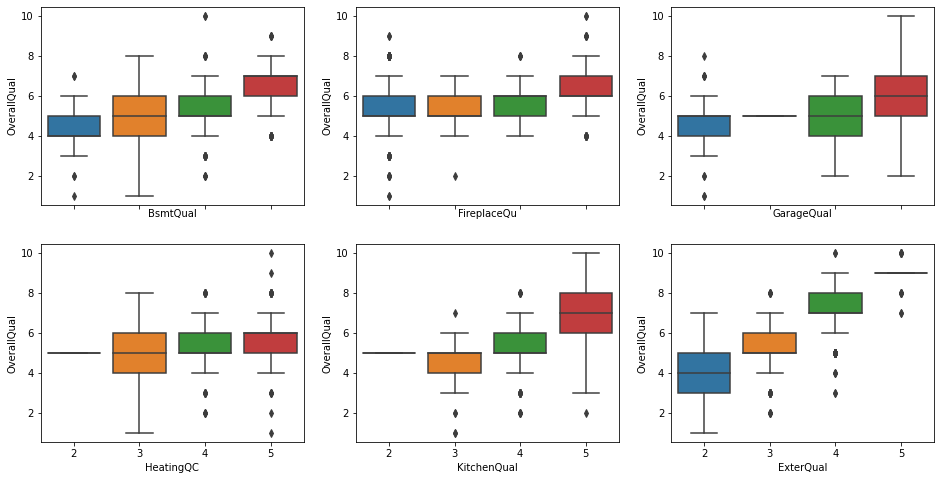

In [14]:
from matplotlib import pyplot as plt
fig, axes = plt.subplots(2, 3, sharex=True, figsize=(16,8))
sns.boxplot(x='BsmtQual', y="OverallQual", data=quality_condition,ax=axes[0, 0])
sns.boxplot(x='FireplaceQu', y="OverallQual", data=quality_condition,ax=axes[0, 1])
sns.boxplot(x='GarageQual', y="OverallQual", data=quality_condition,ax=axes[0, 2])
sns.boxplot(x='HeatingQC', y="OverallQual", data=quality_condition,ax=axes[1, 0])
sns.boxplot(x='KitchenQual', y="OverallQual", data=quality_condition,ax=axes[1, 1])
sns.boxplot(x='ExterQual', y="OverallQual", data=quality_condition,ax=axes[1, 2])

In [15]:
quality_condition.columns

Index(['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual',
       'BsmtCond', 'HeatingQC', 'KitchenQual', 'FireplaceQu', 'GarageQual',
       'GarageCond'],
      dtype='object')

<AxesSubplot:xlabel='HeatingQC', ylabel='OverallCond'>

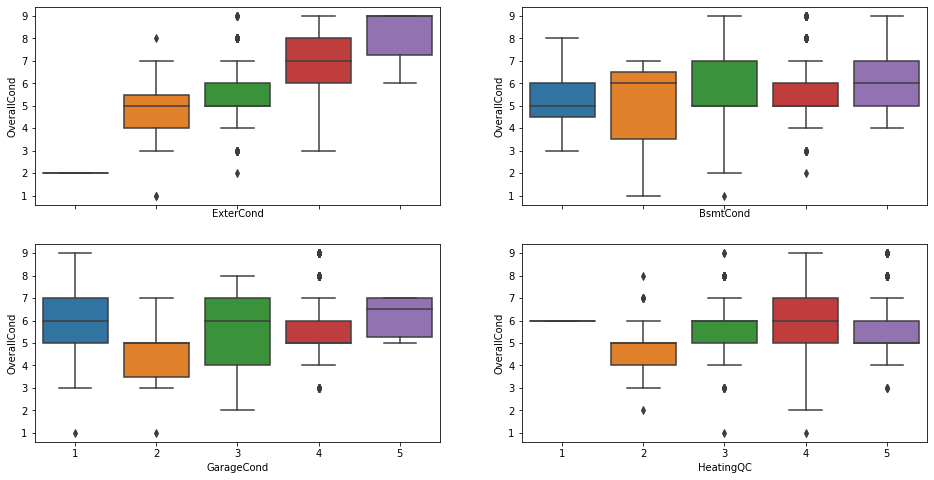

In [16]:
#Looking at the condition
fig, axes = plt.subplots(2, 2, sharex=True, figsize=(16,8))
sns.boxplot(x='ExterCond', y="OverallCond", data=quality_condition,ax=axes[0, 0])
sns.boxplot(x='BsmtCond', y="OverallCond", data=quality_condition,ax=axes[0, 1])
sns.boxplot(x='GarageCond', y="OverallCond", data=quality_condition,ax=axes[1, 0])
sns.boxplot(x='HeatingQC', y="OverallCond", data=quality_condition,ax=axes[1, 1])

From the boxplots above, external quality and kitchen quality has maximum impact on the overall quality
External Condition has maximum impact on overall condition
So, for a house to be rated high in terms of quality and condition it is very important to keep the external quality
and condition in good state and kitchen quality too
I can drop the external quantity and external condition and kitchen condition row as overall quality and condition are good indicators of these three features

# Extqual, ExtCond and KitchenCond effected overall quality and condition so I dropped these three features 

In [17]:
train_housing = train_housing.drop(['ExterCond','ExterQual','KitchenQual'], axis=1)

In [18]:
train_housing.shape

(1838, 72)

In [19]:
#I will see if the other features influence sale price
train_housing

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotArea Street  \
754  905102170       1040     129500          20       RL    11200   Pave   
404  903234160        986     102000          30       RM     6180   Pave   
538  903425110       1710     140000          70       RM    10300   Pave   
777  907131190       1463     207000          20       RL    14753   Pave   
726  905104210        912     125000          20       RL     8521   Pave   
..         ...        ...        ...         ...      ...      ...    ...   
594  534431130        960     122000          20       RL     9768   Pave   
738  528250040       1342     178000          60       RL     8174   Pave   
294  535151160       1283     140000          20       RL     7763   Pave   
738  534426110       1041     124500          20       RL     9600   Pave   
136  531451150       1266     128000         160       RL     8012   Pave   

        Alley LotShape LandContour  ... EnclosedPorch 3SsnPorch ScreenPorch  \
754  No_Alley      Reg         Lvl  ...             0         0           0   
404  No_Alley      Reg         Lvl  ...             0         0           0   
538  No_Alley      IR1         Bnk  ...            64         0           0   
777  No_Alley      IR2         Low  ...             0         0           0   
726  No_Alley      Reg         Lvl  ...             0         0           0   
..        ...      ...         ...  ...           ...       ...         ...   
594  No_Alley      Reg         Lvl  ...             0         0           0   
738  No_Alley      IR1         Lvl  ...             0         0           0   
294  No_Alley      Reg         Lvl  ...             0         0           0   
738  No_Alley      Reg         Lvl  ...             0         0           0   
136  No_Alley      Reg         Lvl  ...             0         0           0   

        Fence     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
754  No_Fence  No_MiscFeature       0      2   2008       WD          Normal  
404  No_Fence  No_MiscFeature       0      5   2007       WD          Normal  
538     GdPrv  No_MiscFeature       0      4   2010       WD          Normal  
777     GdPrv  No_MiscFeature       0     12   2009       WD          Normal  
726     MnPrv  No_MiscFeature       0      5   2010       WD          Normal  
..        ...             ...     ...    ...    ...       ...            ...  
594     MnPrv  No_MiscFeature       0      2   2009       WD          Normal  
738  No_Fence  No_MiscFeature       0      5   2009       WD          Normal  
294  No_Fence  No_MiscFeature       0     10   2008       WD          Normal  
738     MnPrv  No_MiscFeature       0      7   2009       WD          Normal  
136     MnPrv  No_MiscFeature       0      7   2007       WD          Normal  

[1838 rows x 72 columns]

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

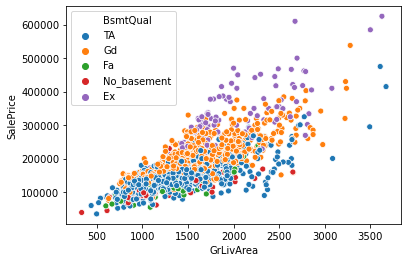

In [20]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtQual')
#Bsmnt Quality has effect on sales price of same sized houses

# Good and Excellent Basement Condition added value to the saleprice so I kept the feature

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

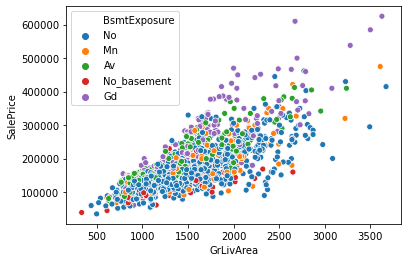

In [21]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtExposure')
#There is no visible  pattern for basement exposure

# There is no pattern seen on price with basement exposure, so I dropped it

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

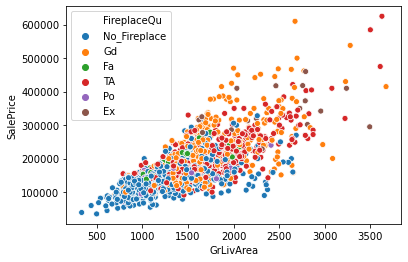

In [22]:
# fig = px.scatter(train_housing, x='GrLivArea', y='SalePrice', color='FireplaceQu')
# fig
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='FireplaceQu')
#No visible pattern is seen for fireplace and most houses do not have fireplace too

# Many houses do not have fireplace anrd there is no visible effect of fireplacequality, so I dropped that too

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

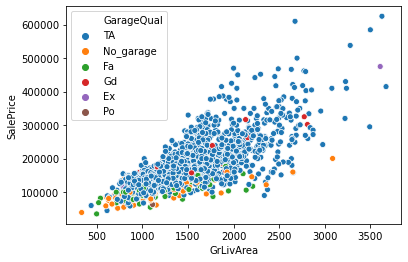

In [23]:
# fig = px.scatter(train_housing, x='GrLivArea', y='SalePrice', color='GarageQual')
# fig
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='GarageQual')
#Most garages have fair to typical rating and  does not effect much

# Most garages have fair and typical rating  and the rating does not effect the saleprice a lot so dropped that too

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

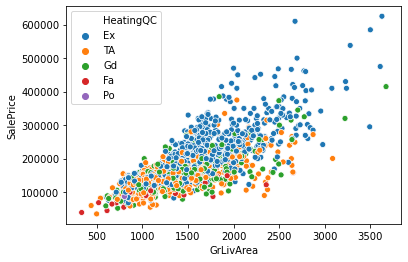

In [24]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='HeatingQC')
#Bigger houses with excellent heating are higher priced

# Bigger houses with excellent heating are higher priced so i kept the heating quality

<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

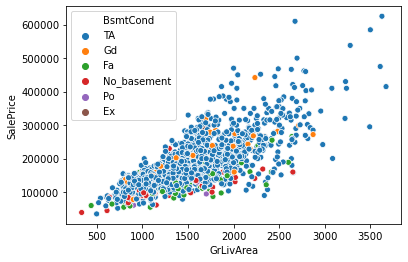

In [25]:
sns.scatterplot(data=train_housing, x='GrLivArea', y='SalePrice', hue='BsmtCond')
#Not much is seen of Bsmnt condition

In [26]:
#I will drop 'BsmtCond','GarageQual','FireplaceQu','BsmtExposure'
train_housing=train_housing.drop(['BsmtCond','GarageQual','FireplaceQu','BsmtExposure'],axis =1)

In [27]:
train_housing.shape

(1838, 68)

# # Neighborhood Analysis

In [28]:
train_housing.columns

Index(['PID', 'GrLivArea', 'SalePrice', 'MSSubClass', 'MSZoning', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'Foundation',
       'BsmtQual', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType'

In [29]:
train_housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1838 entries, 754 to 136
Data columns (total 68 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PID            1838 non-null   int64  
 1   GrLivArea      1838 non-null   int64  
 2   SalePrice      1838 non-null   int64  
 3   MSSubClass     1838 non-null   int64  
 4   MSZoning       1838 non-null   object 
 5   LotArea        1838 non-null   int64  
 6   Street         1838 non-null   object 
 7   Alley          1838 non-null   object 
 8   LotShape       1838 non-null   object 
 9   LandContour    1838 non-null   object 
 10  Utilities      1838 non-null   object 
 11  LotConfig      1838 non-null   object 
 12  LandSlope      1838 non-null   object 
 13  Neighborhood   1838 non-null   object 
 14  Condition1     1838 non-null   object 
 15  Condition2     1838 non-null   object 
 16  BldgType       1838 non-null   object 
 17  HouseStyle     1838 non-null   object 
 18  Overall

In [30]:
train_housing['MiscVal']

754    0
404    0
538    0
777    0
726    0
      ..
594    0
738    0
294    0
738    0
136    0
Name: MiscVal, Length: 1838, dtype: int64

In [31]:
price_neihbor = train_housing.groupby('Neighborhood')['GrLivArea','SalePrice'].mean().sort_values('SalePrice')
#There are 28 neighborhoods

In [32]:
price_neihbor = price_neihbor.reset_index()
price_neihbor

Neighborhood    GrLivArea      SalePrice
0       MeadowV  1056.826087   90382.173913
1        BrDale  1121.190476  109021.428571
2        IDOTRR  1270.085106  118133.595745
3       BrkSide  1264.026316  127579.934211
4       Edwards  1288.551181  128201.181102
5       OldTown  1429.152439  128587.548780
6         SWISU  1531.516129  134298.387097
7       Landmrk  1320.000000  137000.000000
8        Sawyer  1179.588235  137761.029412
9       NPkVill  1217.733333  139456.666667
10      Blueste  1152.000000  145766.666667
11        NAmes  1284.184713  145906.707006
12      Mitchel  1320.385542  166836.746988
13      SawyerW  1598.258824  184701.764706
14       Greens  1132.833333  187125.000000
15      Gilbert  1642.000000  189385.766990
16       NWAmes  1741.197802  195567.032967
17      Crawfor  1660.651515  196969.272727
18      CollgCr  1467.845304  198028.375691
19      Blmngtn  1436.083333  198610.000000
20      ClearCr  1776.108108  215790.054054
21       Timber  1743.928571  245576.523810
22      Veenker  1705.055556  258391.666667
23      Somerst  1698.263158  261064.315789
24      GrnHill  1398.500000  280000.000000
25      StoneBr  1796.000000  280622.500000
26      NridgHt  1884.424658  298985.616438
27      NoRidge  2445.327586  324191.517241

In [33]:
import plotly.express as px
fig = px.bar(price_neihbor, x='Neighborhood', y='SalePrice', title='Neigborhood Average Price')
fig.update_yaxes(title_text='Average House Price')
fig

In [37]:
import plotly.express as px
fig = px.bar(price_neihbor, x='Neighborhood', y='GrLivArea', title='Average size of Houses in Each Neighborhood')
fig.update_xaxes(categoryorder='total ascending')
fig.update_yaxes(title_text='Average Gross Living Area')
fig

# NoRidge has the biggest houses and GrnHill has the most price/sqft

In [80]:
#NoRidge Neigborhood has the largest average size houses and has highest average price too
#GrnHill has very high square ft price

In [39]:
Neghbourhood = train_housing.filter(['Neighborhood','BldgType'], axis=1)

In [40]:
Neghbourhood = Neghbourhood.reset_index()
Neghbourhood

index Neighborhood BldgType
0       754       Sawyer     1Fam
1       404      BrkSide     1Fam
2       538      OldTown     1Fam
3       777      CollgCr     1Fam
4       726       Sawyer     1Fam
...     ...          ...      ...
1833    594        NAmes     1Fam
1834    738      Gilbert     1Fam
1835    294        NAmes     1Fam
1836    738        NAmes     1Fam
1837    136      SawyerW   TwnhsE

[1838 rows x 3 columns]

In [41]:
import plotly.express as px
fig = px.histogram(Neghbourhood, x='Neighborhood', color='BldgType', title='Number of Houses in Each Neighborhood')
fig.update_xaxes(categoryorder='total ascending')
fig

In [42]:
#To keep all the dummified features in both test and train, I will drop the features from entire dataset and split based
#on feature engineered train-test using PID
housing_data = pd.read_csv('housing_data.csv')


In [43]:
housing_data

Unnamed: 0        PID  GrLivArea  SalePrice  MSSubClass MSZoning  \
0              1  909176150        856     126000          30       RL   
1              2  905476230       1049     139500         120       RL   
2              4  535377150       1039     114000          70       RL   
3              5  534177230       1665     227000          60       RL   
4              6  908128060       1922     198500          85       RL   
...          ...        ...        ...        ...         ...      ...   
2284         759  903205040        952     121000          30       RL   
2285         760  905402060       1733     139600          20       RL   
2286         761  909275030       2002     145000          90       RH   
2287         762  907192040       1842     217500          60       RL   
2288         763  906223180       1911     215000          60       RL   

      LotArea Street     Alley LotShape  ... EnclosedPorch 3SsnPorch  \
0        7890   Pave  No_Alley      Reg  ...             0         0   
1        4235   Pave  No_Alley      Reg  ...             0         0   
2        8146   Pave  No_Alley      Reg  ...           168         0   
3        8400   Pave  No_Alley      Reg  ...             0         0   
4        7301   Pave  No_Alley      Reg  ...           177         0   
...       ...    ...       ...      ...  ...           ...       ...   
2284     8854   Pave  No_Alley      Reg  ...             0         0   
2285    13680   Pave  No_Alley      IR1  ...             0         0   
2286     6270   Pave  No_Alley      Reg  ...             0         0   
2287     8826   Pave  No_Alley      Reg  ...             0         0   
2288     9554   Pave  No_Alley      IR1  ...             0         0   

     ScreenPorch     Fence     MiscFeature MiscVal MoSold YrSold SaleType  \
0            166  No_Fence  No_MiscFeature       0      3   2010      WD    
1              0  No_Fence  No_MiscFeature       0      2   2009      WD    
2            111  No_Fence  No_MiscFeature       0      5   2009      WD    
3              0  No_Fence  No_MiscFeature       0     11   2009      WD    
4              0  No_Fence  No_MiscFeature       0      7   2009    ConLD   
...          ...       ...             ...     ...    ...    ...      ...   
2284          40  No_Fence  No_MiscFeature       0      5   2009      WD    
2285           0  No_Fence  No_MiscFeature       0      6   2009      WD    
2286           0  No_Fence  No_MiscFeature       0      8   2007      WD    
2287           0  No_Fence  No_MiscFeature       0      7   2007      WD    
2288           0  No_Fence  No_MiscFeature       0      9   2006      WD    

      SaleCondition  
0            Normal  
1            Normal  
2            Normal  
3            Normal  
4            Normal  
...             ...  
2284         Normal  
2285         Normal  
2286         Normal  
2287         Normal  
2288         Normal  

[2289 rows x 69 columns]

In [44]:
housing_data=housing_data.drop(['Unnamed: 0'], axis=1)
housing_data

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotArea Street  \
0     909176150        856     126000          30       RL     7890   Pave   
1     905476230       1049     139500         120       RL     4235   Pave   
2     535377150       1039     114000          70       RL     8146   Pave   
3     534177230       1665     227000          60       RL     8400   Pave   
4     908128060       1922     198500          85       RL     7301   Pave   
...         ...        ...        ...         ...      ...      ...    ...   
2284  903205040        952     121000          30       RL     8854   Pave   
2285  905402060       1733     139600          20       RL    13680   Pave   
2286  909275030       2002     145000          90       RH     6270   Pave   
2287  907192040       1842     217500          60       RL     8826   Pave   
2288  906223180       1911     215000          60       RL     9554   Pave   

         Alley LotShape LandContour  ... EnclosedPorch 3SsnPorch ScreenPorch  \
0     No_Alley      Reg         Lvl  ...             0         0         166   
1     No_Alley      Reg         Lvl  ...             0         0           0   
2     No_Alley      Reg         Lvl  ...           168         0         111   
3     No_Alley      Reg         Lvl  ...             0         0           0   
4     No_Alley      Reg         Lvl  ...           177         0           0   
...        ...      ...         ...  ...           ...       ...         ...   
2284  No_Alley      Reg         Lvl  ...             0         0          40   
2285  No_Alley      IR1         Lvl  ...             0         0           0   
2286  No_Alley      Reg         HLS  ...             0         0           0   
2287  No_Alley      Reg         Lvl  ...             0         0           0   
2288  No_Alley      IR1         Lvl  ...             0         0           0   

         Fence     MiscFeature MiscVal MoSold YrSold  SaleType  SaleCondition  
0     No_Fence  No_MiscFeature       0      3   2010       WD          Normal  
1     No_Fence  No_MiscFeature       0      2   2009       WD          Normal  
2     No_Fence  No_MiscFeature       0      5   2009       WD          Normal  
3     No_Fence  No_MiscFeature       0     11   2009       WD          Normal  
4     No_Fence  No_MiscFeature       0      7   2009     ConLD         Normal  
...        ...             ...     ...    ...    ...       ...            ...  
2284  No_Fence  No_MiscFeature       0      5   2009       WD          Normal  
2285  No_Fence  No_MiscFeature       0      6   2009       WD          Normal  
2286  No_Fence  No_MiscFeature       0      8   2007       WD          Normal  
2287  No_Fence  No_MiscFeature       0      7   2007       WD          Normal  
2288  No_Fence  No_MiscFeature       0      9   2006       WD          Normal  

[2289 rows x 68 columns]

In [45]:
housing_data["MSSubClass"]

0        30
1       120
2        70
3        60
4        85
       ... 
2284     30
2285     20
2286     90
2287     60
2288     60
Name: MSSubClass, Length: 2289, dtype: int64

In [46]:
#These are numeric looking categorical variables so I will transform them to categorical
housing_data[["MSSubClass","OverallQual","OverallCond","YearBuilt","YearRemodAdd","YrSold"]]=housing_data[["MSSubClass","OverallQual",
                                                                                                           "OverallCond","YearBuilt","YearRemodAdd","YrSold"]].astype('category')



In [47]:
housing_dummy =pd.get_dummies(housing_data)

In [48]:
housing_dummy = housing_dummy.reset_index()
housing_dummy

index        PID  GrLivArea  SalePrice  LotArea  BsmtFinSF1  BsmtFinSF2  \
0         0  909176150        856     126000     7890       238.0         0.0   
1         1  905476230       1049     139500     4235       552.0       393.0   
2         2  535377150       1039     114000     8146         0.0         0.0   
3         3  534177230       1665     227000     8400       643.0         0.0   
4         4  908128060       1922     198500     7301         0.0         0.0   
...     ...        ...        ...        ...      ...         ...         ...   
2284   2284  903205040        952     121000     8854         0.0         0.0   
2285   2285  905402060       1733     139600    13680         0.0         0.0   
2286   2286  909275030       2002     145000     6270       284.0         0.0   
2287   2287  907192040       1842     217500     8826       841.0         0.0   
2288   2288  906223180       1911     215000     9554       380.0         0.0   

      BsmtUnfSF  TotalBsmtSF  1stFlrSF  ...  SaleType_COD  SaleType_CWD  \
0         618.0        856.0       856  ...             0             0   
1         104.0       1049.0      1049  ...             0             0   
2         405.0        405.0       717  ...             0             0   
3         167.0        810.0       810  ...             0             0   
4           0.0          0.0       495  ...             0             0   
...         ...          ...       ...  ...           ...           ...   
2284      952.0        952.0       952  ...             0             0   
2285        0.0          0.0      1733  ...             0             0   
2286      717.0       1001.0      1001  ...             0             0   
2287      144.0        985.0       985  ...             0             0   
2288      397.0        777.0      1065  ...             0             0   

      SaleType_Con  SaleType_ConLD  SaleType_ConLI  SaleType_ConLw  \
0                0               0               0               0   
1                0               0               0               0   
2                0               0               0               0   
3                0               0               0               0   
4                0               1               0               0   
...            ...             ...             ...             ...   
2284             0               0               0               0   
2285             0               0               0               0   
2286             0               0               0               0   
2287             0               0               0               0   
2288             0               0               0               0   

      SaleType_Oth  SaleType_VWD  SaleType_WD   SaleCondition_Normal  
0                0             0             1                     1  
1                0             0             1                     1  
2                0             0             1                     1  
3                0             0             1                     1  
4                0             0             0                     1  
...            ...           ...           ...                   ...  
2284             0             0             1                     1  
2285             0             0             1                     1  
2286             0             0             1                     1  
2287             0             0             1                     1  
2288             0             0             1                     1  

[2289 rows x 456 columns]

In [49]:
housing_dummy=housing_dummy.drop(['index'], axis=1)

In [62]:
housing_dummy=housing_dummy.set_index('PID')

In [63]:
housing_dummy = housing_dummy.reset_index()
housing_dummy

GrLivArea  SalePrice  LotArea  BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  \
PID                                                                           
909176150        856     126000     7890       238.0         0.0      618.0   
905476230       1049     139500     4235       552.0       393.0      104.0   
535377150       1039     114000     8146         0.0         0.0      405.0   
534177230       1665     227000     8400       643.0         0.0      167.0   
908128060       1922     198500     7301         0.0         0.0        0.0   
...              ...        ...      ...         ...         ...        ...   
903205040        952     121000     8854         0.0         0.0      952.0   
905402060       1733     139600    13680         0.0         0.0        0.0   
909275030       2002     145000     6270       284.0         0.0      717.0   
907192040       1842     217500     8826       841.0         0.0      144.0   
906223180       1911     215000     9554       380.0         0.0      397.0   

           TotalBsmtSF  1stFlrSF  2ndFlrSF  LowQualFinSF  ...  SaleType_COD  \
PID                                                       ...                 
909176150        856.0       856         0             0  ...             0   
905476230       1049.0      1049         0             0  ...             0   
535377150        405.0       717       322             0  ...             0   
534177230        810.0       810       855             0  ...             0   
908128060          0.0       495      1427             0  ...             0   
...                ...       ...       ...           ...  ...           ...   
903205040        952.0       952         0             0  ...             0   
905402060          0.0      1733         0             0  ...             0   
909275030       1001.0      1001      1001             0  ...             0   
907192040        985.0       985       857             0  ...             0   
906223180        777.0      1065       846             0  ...             0   

           SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_ConLI  \
PID                                                                     
909176150             0             0               0               0   
905476230             0             0               0               0   
535377150             0             0               0               0   
534177230             0             0               0               0   
908128060             0             0               1               0   
...                 ...           ...             ...             ...   
903205040             0             0               0               0   
905402060             0             0               0               0   
909275030             0             0               0               0   
907192040             0             0               0               0   
906223180             0             0               0               0   

           SaleType_ConLw  SaleType_Oth  SaleType_VWD  SaleType_WD   \
PID                                                                   
909176150               0             0             0             1   
905476230               0             0             0             1   
535377150               0             0             0             1   
534177230               0             0             0             1   
908128060               0             0             0             0   
...                   ...           ...           ...           ...   
903205040               0             0             0             1   
905402060               0             0             0             1   
909275030               0             0             0             1   
907192040               0             0             0             1   
906223180               0             0             0             1   

           SaleCondition_Normal  
PID                              
909176150    

In [52]:
train_housing=train_housing.set_index('PID')

In [83]:
test_housing = pd.read_csv('test_housing_dropnull.csv', index_col=0)

In [84]:
test_housing.shape

(451, 68)

In [85]:
test_housing_final=test_housing.set_index('PID')

In [86]:
test_housing_final = test_housing_final.reset_index()
test_housing_final

GrLivArea  SalePrice  MSSubClass MSZoning  LotArea Street  \
PID                                                                    
531452020        918      99500         120       RL     7892   Pave   
908204160       1152      82500          90       RL     6845   Pave   
909179020       3082     197000          75       RL    15863   Pave   
907280170       1417     210000          20       RL     8750   Pave   
526353050       2117     237500          20       RL    12925   Pave   
...              ...        ...         ...      ...      ...    ...   
908127120        996     108000          30       RL    13907   Pave   
905104030        913     129000          85       RL     8400   Pave   
907192130       1494     221000          20       RL    12803   Pave   
528250020       1489     192000          60       RL     8965   Pave   
535305120       1575     155000          20       RL    10170   Pave   

              Alley LotShape LandContour Utilities  ... EnclosedPorch  \
PID                                                 ...                 
531452020  No_Alley      Reg         Lvl    AllPub  ...             0   
908204160  No_Alley      Reg         Lvl    AllPub  ...             0   
909179020  No_Alley      Reg         Lvl    AllPub  ...             0   
907280170  No_Alley      Reg         Lvl    AllPub  ...             0   
526353050  No_Alley      IR1         Lvl    AllPub  ...             0   
...             ...      ...         ...       ...  ...           ...   
908127120  No_Alley      Reg         Lvl    AllPub  ...             0   
905104030  No_Alley      Reg         Lvl    AllPub  ...           252   
907192130  No_Alley      IR1         Lvl    AllPub  ...             0   
528250020  No_Alley      IR1         Lvl    AllPub  ...             0   
535305120  No_Alley      Reg         Lvl    AllPub  ...             0   

          3SsnPorch ScreenPorch     Fence     MiscFeature MiscVal MoSold  \
PID                                                                        
531452020         0           0  No_Fence  No_MiscFeature       0      4   
908204160         0           0  No_Fence  No_MiscFeature       0      7   
909179020         0           0  No_Fence  No_MiscFeature       0      8   
907280170         0         117  No_Fence  No_MiscFeature       0      8   
526353050         0           0  No_Fence  No_MiscFeature       0      5   
...             ...         ...       ...             ...     ...    ...   
908127120         0           0  No_Fence  No_MiscFeature       0      7   
905104030         0           0  No_Fence  No_MiscFeature       0      5   
907192130         0           0  No_Fence  No_MiscFeature       0      9   
528250020         0           0  No_Fence  No_MiscFeature       0      6   
535305120         0           0  No_Fence  No_MiscFeature       0      6   

           YrSold  SaleType  SaleCondition  
PID                                         
531452020    2010       WD          Normal  
908204160    2008       WD          Normal  
909179020    2009       WD          Normal  
907280170    2009       WD          Normal  
526353050    2008       WD          Normal  
...           ...       ...            ...  
908127120    2008       WD          Normal  
905104030    2007       WD          Normal  
907192130    2008       WD          Normal  
528250020    2009       WD          Normal  
535305120    2006       WD          Normal  

[451 rows x 67 columns]

In [64]:
train_final = housing_dummy[housing_dummy.index.isin(train_housing.index)]

In [87]:
test_final = housing_dummy[housing_dummy.index.isin(test_housing_final.index)]

In [88]:
train_final.shape

(1838, 454)

In [89]:
test_final.shape

(451, 454)

Text(0, 0.5, '# houses sold')

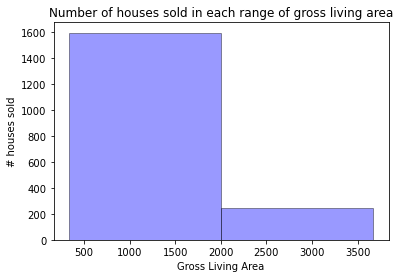

In [90]:
# The price/sqft has negative relation with geoss ares from log-log linear model
#More houses are below 2000 sqft so people prefer to buy houses within 2000 sqft and pays premium upto 2000
plot2 = sns.distplot(train_final['GrLivArea'], hist=True, kde=False, 
             bins=2, color = 'blue',
             hist_kws={'edgecolor':'black'})
plot2.set_title('Number of houses sold in each range of gross living area')
plot2.set_xlabel('Gross Living Area', size = 10)
plot2.set_ylabel('# houses sold', size= 10)

Text(0, 0.5, 'Density(# houses sold)')

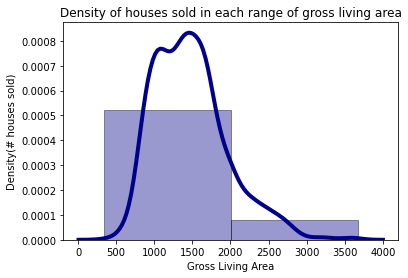

In [184]:
plot1 = sns.distplot(train_final['GrLivArea'], hist=True, kde=True, 
             bins=2, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plot1.set_title('Density of houses sold in each range of gross living area')
plot1.set_xlabel('Gross Living Area', size = 10)
plot1.set_ylabel('Density(# houses sold)', size= 10)

In [96]:
import plotly.express as px
fig = px.scatter(train_final, x='GrLivArea', y='SalePrice')
fig

In [92]:
price_sqft = train_final.filter(['SalePrice','GrLivArea'], axis=1)

In [93]:
price_sqft['Price per sqft'] = price_sqft['SalePrice'] / price_sqft['GrLivArea']

In [97]:
import plotly.express as px
fig = px.scatter(price_sqft, x='GrLivArea', y=['Price per sqft', 'GrLivArea'])
fig

<AxesSubplot:xlabel='GrLivArea', ylabel='Price per sqft'>

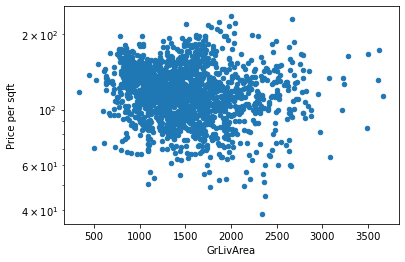

In [98]:
price_sqft[['GrLivArea', 'Price per sqft']].plot(kind='scatter', x='GrLivArea', y='Price per sqft', logy=True)


In [105]:
#Reading to csv
train_final.to_csv('train_final.csv')
test_final.to_csv('test_final.csv')